## B반 최효진
## 랜덤포레스트
유방암 결과를 분류하는 랜덤 포레스트 모델을 만들고 predict method를 이용하여 목표변수 범주를 예측하라. 그리고 모델의 정확도와 confusion matrix를 구하라.

데이터 : 유방암.csv(변수 : 31개, 자료 수 : 569개)
-목표변수(diagnosis, 0: Malignant(악성, 357개), 1: Benign(양성, 212개)

#### 패키지 불러오기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

#### 한글 폰트 적용하기

In [2]:
matplotlib.rc("font", family = "NanumGothic")

#### 데이터 분할하기

In [3]:
df_raw = pd.read_csv("/home/pirl/Downloads/유방암.csv")

df_raw.fillna(df_raw.mean(), inplace=True)

df_raw_dummy = pd.get_dummies(df_raw)

df_raw_x = df_raw_dummy.drop("diagnosis", axis = 1, inplace = False)
df_raw_y = df_raw_dummy["diagnosis"] 

df_train_first_x, df_test_first_x, df_train_first_y, df_test_first_y = train_test_split(df_raw_x, # 설명변수 데이터
                                                                df_raw_y, # 목표변수 데이터
                                                                test_size = 0.3, # test 데이터의 비율
                                                                random_state = 1234)  # random state
print("train data X size : {}".format(df_train_first_x.shape))
print("train data Y size : {}".format(df_train_first_y.shape))
print("test data X size : {}".format(df_test_first_x.shape))
print("test data Y size : {}".format(df_test_first_y.shape))

train data X size : (398, 30)
train data Y size : (398,)
test data X size : (171, 30)
test data Y size : (171,)


In [4]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_train_first_x,df_train_first_y,test_size=0.4285, random_state = 1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("validation data X size : {}".format(df_test_x.shape))
print("validation data Y size : {}".format(df_test_y.shape))

train data X size : (227, 30)
train data Y size : (227,)
validation data X size : (171, 30)
validation data Y size : (171,)


#### 결측치 확인하기


In [5]:
df_raw.isnull().sum()

diagnosis                  0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

#### train,test 정확도 확인

In [6]:
rf_uncustomized = RandomForestClassifier(random_state=1234)
rf_uncustomized.fit(df_train_x, df_train_y)
print("Accuracy on training set: {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set: 0.996
Accuracy on test set: 0.953


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### 모델 Parameter 조정
#### n_estimators : 트리의 개수 변경 시 모델의 정확도 확인

In [7]:
train_accuracy = []; test_accuracy = []
para_n_tree = [n_tree * 10 for n_tree in range(1, 16)]

for v_n_estimators in para_n_tree:
    rf = RandomForestClassifier(n_estimators = v_n_estimators, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

df_accuracy_n = pd.DataFrame()
df_accuracy_n["n_estimators"] = para_n_tree
df_accuracy_n["TrainAccuracy"] = train_accuracy
df_accuracy_n["TestAccuracy"] = test_accuracy

In [8]:
df_accuracy_n.round(3)

,n_estimators,TrainAccuracy,TestAccuracy
0,10,0.996,0.953
1,20,0.996,0.953
2,30,1.000,0.953
3,40,1.000,0.953
4,50,1.000,0.947
5,60,1.000,0.953
6,70,1.000,0.953
7,80,1.000,0.953
8,90,1.000,0.953
9,100,1.000,0.953


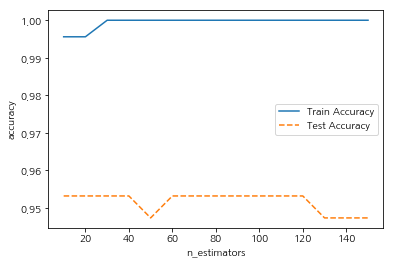

In [9]:
plt.plot(para_n_tree, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_n_tree, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("n_estimators"); plt.ylabel("accuracy")
plt.legend()

### ==> 트리의 개수가 많아질 수록 정확도가 높다.

#### n_estimators : 트리의 개수 벽녕 시 모델의 obb error 변화

In [10]:
oob_error = []

for v_n_estimator in range(1, 151):
    rf = RandomForestClassifier(n_estimators = v_n_estimator, oob_score = True, random_state= 1234)
    rf.fit(df_train_x, df_train_y)
    oob_error.append(1 - rf.oob_score_)

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not hav

In [11]:
oob_error

[0.2599118942731278,
 0.18942731277533043,
 0.1277533039647577,
 0.1145374449339207,
 0.08370044052863435,
 0.06607929515418498,
 0.06607929515418498,
 0.03964757709251099,
 0.04405286343612336,
 0.04405286343612336,
 0.052863436123347984,
 0.048458149779735726,
 0.04405286343612336,
 0.03964757709251099,
 0.04405286343612336,
 0.048458149779735726,
 0.048458149779735726,
 0.04405286343612336,
 0.03964757709251099,
 0.03964757709251099,
 0.03083700440528636,
 0.03964757709251099,
 0.03524229074889873,
 0.03524229074889873,
 0.03083700440528636,
 0.03083700440528636,
 0.03083700440528636,
 0.03083700440528636,
 0.03083700440528636,
 0.03524229074889873,
 0.03083700440528636,
 0.03083700440528636,
 0.03083700440528636,
 0.026431718061673992,
 0.03083700440528636,
 0.022026431718061623,
 0.022026431718061623,
 0.026431718061673992,
 0.03083700440528636,
 0.03083700440528636,
 0.03524229074889873,
 0.03964757709251099,
 0.03524229074889873,
 0.026431718061673992,
 0.03083700440528636,
 0.0

Text(0.5, 0, 'n_estimators')

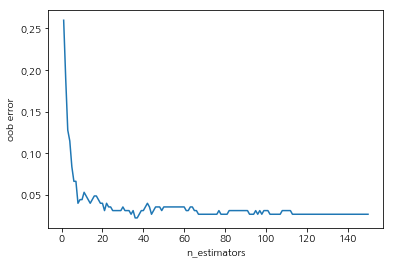

In [12]:
# 그래프로 표현
plt.plot(range(1, 151), oob_error)
plt.ylabel("oob error")
plt.xlabel("n_estimators")

### ==> 트리의 개수가 많아질수록 obb 오차가 줄어든다.

In [13]:
n_estimators = 100

### ==> 임의로 지정

#### max_depth : 최대 깊이 변경

In [14]:
train_accuracy = []; test_accuracy = []
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    rf = RandomForestClassifier(max_depth = v_max_depth, n_estimators = 100, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy

In [15]:
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.934,0.924
1,2,0.978,0.930
2,3,0.987,0.947
3,4,0.996,0.947
4,5,1.000,0.947
5,6,1.000,0.953
6,7,1.000,0.953
7,8,1.000,0.953
8,9,1.000,0.953
9,10,1.000,0.953


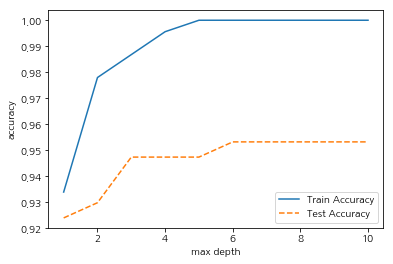

In [16]:
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("max depth"); plt.ylabel("accuracy")
plt.legend()

### ==> 깊이가 깊어질 수록 정확도는 올라가는 경향을 보인다.

In [17]:
max_depth = 3

#### min_samples_split : 분할하기 위한 노드의 최소 샘플 수 

In [18]:
train_accuracy = []; test_accuracy = []
para_split = [n_split * 10 for n_split in range(1, 11)]

for v_min_samples_split in para_split:
    rf = RandomForestClassifier(min_samples_split = v_min_samples_split, max_depth = 3,
                                n_estimators = 100, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy

In [19]:
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,10,0.987,0.947
1,20,0.987,0.947
2,30,0.982,0.947
3,40,0.987,0.947
4,50,0.987,0.942
5,60,0.982,0.942
6,70,0.978,0.942
7,80,0.978,0.942
8,90,0.978,0.942
9,100,0.974,0.936


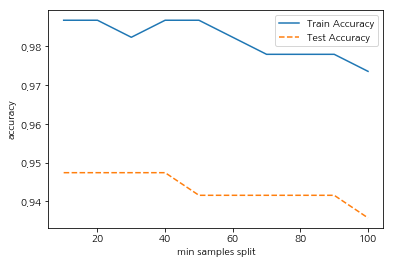

In [20]:
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("min samples split"); plt.ylabel("accuracy")
plt.legend()

### ==> 별다른 영향이 없다.

#### min_samples_leaf : 최소 잎사귀 수 제한

In [21]:
train_accuracy = []; test_accuracy = []
para_leaf = [n_leaf * 10 for n_leaf in range(1, 11)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestClassifier(min_samples_leaf = v_min_samples_leaf,
                                max_depth = 3, n_estimators = 100, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy

In [22]:
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,10,0.982,0.947
1,20,0.960,0.953
2,30,0.943,0.947
3,40,0.938,0.942
4,50,0.943,0.953
5,60,0.938,0.959
6,70,0.921,0.930
7,80,0.630,0.637
8,90,0.630,0.637
9,100,0.630,0.637


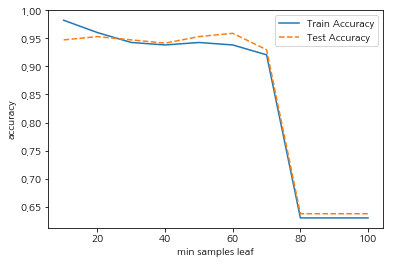

In [23]:
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("min samples leaf"); plt.ylabel("accuracy")
plt.legend()

### ==> train,test 데이터는 최소 잎사귀 수가 증가함에 따라 정확도가 떨어짐

In [24]:
min_samples_leaf = 20

## 최종모델

#### train, validation의 정확도

In [25]:
rf_final = RandomForestClassifier(min_samples_leaf = 20, max_depth = 3, n_estimators = 100,
                                  random_state=1234)
rf_final.fit(df_train_x, df_train_y)
y_pred = rf_final.predict(df_test_x)

print("Accuracy on training set: {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
print("Accuracy on validation set: {:.3f}\n".format(rf_final.score(df_test_x, df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy on training set: 0.960
Accuracy on validation set: 0.953

Confusion matrix: 
[[105   4]
 [  4  58]]


#### train, test의 정확도

In [26]:
rf_final = RandomForestClassifier(min_samples_leaf = 20, max_depth = 3, n_estimators = 100,
                                  random_state=1234)
rf_final.fit(df_train_x, df_train_y)
y_pred = rf_final.predict(df_test_first_x)

print("Accuracy on training set: {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}\n".format(rf_final.score(df_test_first_x, df_test_first_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_first_y, y_pred)))

Accuracy on training set: 0.960
Accuracy on test set: 0.930

Confusion matrix: 
[[104   1]
 [ 11  55]]


### 결론도출
#### feature_importance_:설명변수의 중요도

In [27]:
v_feature_names = df_train_x.columns
df_importance = pd.DataFrame()
df_importance ["Feature"] = v_feature_names
df_importance ["Importance"] = rf_final.feature_importances_
df_importance .sort_values("Importance", ascending=False, inplace = True)
df_importance .round(3)

,Feature,Importance
22,worst perimeter,0.162
20,worst radius,0.140
27,worst concave points,0.136
23,worst area,0.103
7,mean concave points,0.096
6,mean concavity,0.090
0,mean radius,0.066
2,mean perimeter,0.055
3,mean area,0.037
26,worst concavity,0.032


#### 설명변수의 중요도 결과

Text(0, 0.5, '설명변수')

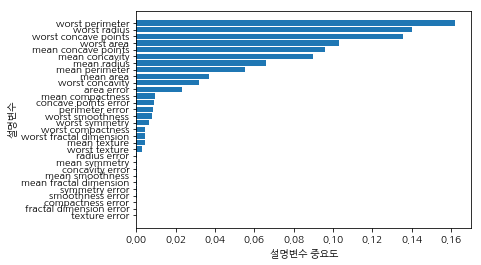

In [28]:
df_importance .sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance ))
plt.barh(y = coordinates, width = df_importance ["Importance"])
plt.yticks(coordinates, df_importance ["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

#### GridSearchCV를 이용한 최적 parameter 찾기

In [29]:
estimator = RandomForestClassifier(n_estimators=100,random_state=1234)
param_grid = {"max_depth": para_depth,
              "min_samples_leaf": para_leaf}
grid_rf = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs = -1)
grid_rf.fit(df_train_x, df_train_y)
print("best estimator model: \n{}".format(grid_rf.best_estimator_))
print("\nbest parameter: \n{}".format(grid_rf.best_params_))
print("\nbest score: \n{}".format(grid_rf.best_score_.round(3)))

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


best estimator model: 
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=1234, verbose=0,
            warm_start=False)

best parameter: 
{'max_depth': 2, 'min_samples_leaf': 10}

best score: 
0.952


### ==> 최대 깊이(max_depth)가 2, 잎사귀의 최소 샘플 수(min_samples_leaf)는 10개일때 정확도 0.952로 가장 높다.